## **CNNs** are powerful image processing, artificial intelligence (AI) that use deep learning to perform both generative and descriptive tasks, often using machine vison that includes image and video recognition, along with recommender systems and natural language processing (NLP).

#So i have implemented a Smoke and Fire Classification model using the CNN architecture. It can classify that the given image contains the smoke or fire and based on the image , it gives a result. I have defined my own CNN architecture and train my model for 25 epochs, it gave me and 98% accuracy on the validation data which is really amazing.

# Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.callbacks import History
import PIL


In [2]:
# img=image.load_img("Dataset/Training_and_Validation/nofire/nofire_0002.jpg")

In [3]:
# plt.imshow(img)

In [4]:
# cv2.imread("smokeee.png")  #.shape

# Data Preprocessing 

In [5]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset=train.flow_from_directory('Dataset/Training/',target_size=(224,224),
                                       class_mode='categorical',shuffle=True)
validation_dataset=validation.flow_from_directory('Dataset/validation/',target_size=(224,224)
                                    ,class_mode='categorical',shuffle=True)


Found 1734 images belonging to 3 classes.
Found 546 images belonging to 3 classes.


In [7]:
train_dataset.class_indices

{'fire': 0, 'nofire': 1, 'smoke': 2}

In [8]:
train_dataset.classes

array([0, 0, 0, ..., 2, 2, 2])

# Implementation of  CNN Architecture

In [9]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(3,activation='softmax'),
                                  
                                 ])


# Model compilation

In [10]:
model.compile(loss='categorical_crossentropy',
optimizer=Adam(lr=0.0001),
metrics=['acc'])

C:\Users\ASUS\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Training the model

In [11]:
history= model.fit(
train_dataset,
steps_per_epoch = 15,
epochs =100,
validation_data = validation_dataset,
validation_steps = 15
)

Epoch 1/100
15/15 [==============================] - 23s 2s/step - loss: 0.4212 - acc: 0.8646 - val_loss: 0.4000 - val_acc: 0.8375
Epoch 2/100
15/15 [==============================] - 17s 1s/step - loss: 0.1748 - acc: 0.9383 - val_loss: 0.1152 - val_acc: 0.9583
Epoch 3/100
15/15 [==============================] - 16s 1s/step - loss: 0.1762 - acc: 0.9479 - val_loss: 0.1167 - val_acc: 0.9583
Epoch 4/100
15/15 [==============================] - 16s 1s/step - loss: 0.1780 - acc: 0.9354 - val_loss: 0.0777 - val_acc: 0.9667
Epoch 5/100
15/15 [==============================] - 16s 1s/step - loss: 0.1163 - acc: 0.9667 - val_loss: 0.0830 - val_acc: 0.9771
Epoch 6/100
15/15 [==============================] - 16s 1s/step - loss: 0.0678 - acc: 0.9750 - val_loss: 0.0835 - val_acc: 0.9812
Epoch 7/100
15/15 [==============================] - 16s 1s/step - loss: 0.0527 - acc: 0.9771 - val_loss: 0.0871 - val_acc: 0.9792
Epoch 8/100
15/15 [==============================] - 15s 995ms/step - loss: 0.0881 

15/15 [==============================] - 20s 1s/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.1038 - val_acc: 0.9833
Epoch 64/100
15/15 [==============================] - 18s 1s/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0965 - val_acc: 0.9854
Epoch 65/100
15/15 [==============================] - 19s 1s/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0770 - val_acc: 0.9896
Epoch 66/100
15/15 [==============================] - 19s 1s/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0923 - val_acc: 0.9875
Epoch 67/100
15/15 [==============================] - 18s 1s/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0933 - val_acc: 0.9812
Epoch 68/100
15/15 [==============================] - 19s 1s/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0962 - val_acc: 0.9812
Epoch 69/100
15/15 [==============================] - 18s 1s/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0872 - val_acc: 0.9896
Epoch 70/100
15/15 [==============================] - 20s 1s/step - loss: 0.0011 - acc: 1

# Model Evaluation

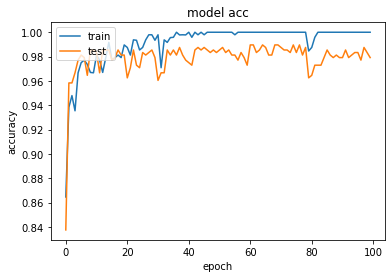

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss


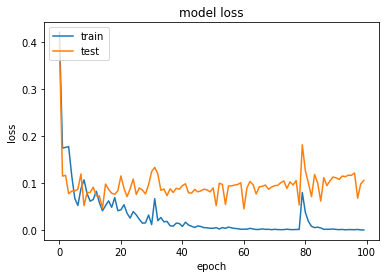

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
score = model.evaluate(validation_dataset)
print('Test accuracy:', score[1])

18/18 [==============================] - 5s 277ms/step - loss: 0.1064 - acc: 0.9799
Test accuracy: 0.9798534512519836


## Saving the model

In [15]:
model.save("/fireproject/Smoke_and_Fire_Classifier.h5")
# model.save("/Smoke_and_Fire_Classifier.h5")


In [16]:
from keras.models import load_model
my_model = load_model("/fireproject/Smoke_and_Fire_Classifier.h5")

# Testing our model

In [17]:
def test_model(image_for_testing):
    test_image=image.load_img(image_for_testing,target_size=(224,224))
    test_image=image.img_to_array(test_image)
    test_image=test_image/255
    test_image=np.expand_dims(test_image,axis=0)
    result=np.argmax(my_model.predict(test_image),axis=1)

    Catagories=['fire', 'nofire', 'smoke']

    image_show=PIL.Image.open(image_for_testing)
    plt.imshow(image_show)

    plt.title(Catagories[int(result)])
    plt.axis("off")
    plt.show()


1/1 [==============================] - 0s 182ms/step


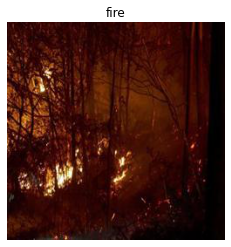

In [18]:
test_model('Dataset/Testing/fire/abc017.jpg')

1/1 [==============================] - 0s 27ms/step


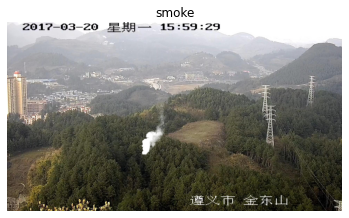

In [19]:
test_model('Dataset/Testing/smoke/000823.jpg')

1/1 [==============================] - 0s 28ms/step


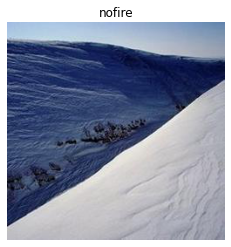

In [20]:
test_model('Dataset/Testing/nofire/abc277.jpg')

In [21]:
# import cv2
# import numpy as np
# from PIL import Image
# import tensorflow as tf
# from keras.preprocessing import image
# #Load the saved model
# model = tf.keras.models.load_model("/fireproject/Smoke_and_Fire_Classifier.h5")
# video = cv2.VideoCapture(0)
# while True:
#         _, frame = video.read()
# #Convert the captured frame into RGB
#         im = Image.fromarray(frame, 'RGB')
# #Resizing into 224x224 because we trained the model with this image size.
#         im = im.resize((224,224))
#         img_array = image.img_to_array(im)
#         img_array = np.expand_dims(img_array, axis=0) / 255
#         probabilities = model.predict(img_array)[0]
#         #Calling the predict method on model to predict 'fire' on the image
#         prediction = np.argmax(probabilities)
#         #if prediction is 0, which means there is fire in the frame.
#         if prediction == 0:
#                 frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
#                 print(probabilities[prediction])
# cv2.imshow("Capturing", frame)
#         key=cv2.waitKey(1)
#         if key == ord('q'):
#                 break
# video.release()
# cv2.destroyAllWindows()
